# Trabalho: Análise de Sentimento

## Alan Pádua e Lucas Santos

1 - Classificar sentimento (positivo e negativo) na base de tweets a ser fornecida utilizando 3 métodos diferentes: 
- Dois métodos clássicos 
- Um método utilizando deep learning 


2 - Um método consiste em uma forma de vetorização (Contagem, vetor binário, TF-IDF, Embeddings, etc.) e um classificador 


3 - O grupo deverá comentar um pouco sobre os métodos utilizados (comentar sobre a vetorização e sobre o classificador) e fazer uma análise de cada método: 
- Acurácia 
- Precision 
- Recall 
- F-measure (F1 Score) 


4 - Fazer comparativo dos métodos utilizando os critérios acima. 
Qual o melhor? 
O que pode melhorar? 
Quais as vantagens e desvantagens de cada método. 


5 - O trabalho deve ser obrigatoriamente apresentado. Haverá sorteio do dia da apresentação e a ordem. 
No dia da apresentação, o grupo terá 15 min para apresentar o trabalho (será utilizado compartilhamento de tela com o grupo). 
O grupo pode utilizar qualquer recurso para facilitar a apresentação (slides, trechos de códigos, etc.)

# Carregar Dados

## Importar Bibliotecas

In [1]:
from TratarDados import TratarDados
from VisualizarDados import VisualizarDados
from Treinamento import Treinamento
from DeepLearning import DeepLearning

from wordcloud import WordCloud
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

visualizar_dados = VisualizarDados()
tratar_dados = TratarDados()
treinamento = Treinamento()
deep_learning = DeepLearning()


2021-08-15 19:54:44.398096: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-15 19:54:44.398131: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Importar dados do CSV

In [2]:
tweets = tratar_dados.importar_parcial(100)
tweets.head()

,Sentimento,Data,Usuario,Texto
800000,4,Mon Apr 06 22:22:45 PDT 2009,ersle,I LOVE @Health4UandPets u guys r the best!!
800001,4,Mon Apr 06 22:22:45 PDT 2009,becca210,im meeting up with one of my besties tonight! ...
800002,4,Mon Apr 06 22:22:46 PDT 2009,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,Mon Apr 06 22:22:46 PDT 2009,katarinka,Being sick can be really cheap when it hurts t...
800004,4,Mon Apr 06 22:22:46 PDT 2009,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone


In [3]:
tweets['Sentimento_Texto'] = tweets['Sentimento'].replace([0, 4, 2],['negativo', 'positivo', 'neutro'])

# tweets = tweets[['Texto', 'Sentimento']]
tweets.drop(['Data','Usuario'], axis=1, inplace=True)

tweets['Texto'] = tweets['Texto'].str.lower()

In [4]:
# Verificar nulos
print('Verificar Nulos\n', tweets.isnull().sum())

# Shape
print('Shape\n', tweets.shape)

Verificar Nulos
 Sentimento          0
Texto               0
Sentimento_Texto    0
dtype: int64
Shape
 (200, 3)


In [5]:
tweets.head()

,Sentimento,Texto,Sentimento_Texto
800000,4,i love @health4uandpets u guys r the best!!,positivo
800001,4,im meeting up with one of my besties tonight! ...,positivo
800002,4,"@darealsunisakim thanks for the twitter add, s...",positivo
800003,4,being sick can be really cheap when it hurts t...,positivo
800004,4,@lovesbrooklyn2 he has that effect on everyone,positivo


# Tratar Dados

## Removendo carater's especiais e estaços extras

In [6]:
%time tweets = tratar_dados.preprocess_reviews(tweets)

CPU times: user 15.9 ms, sys: 0 ns, total: 15.9 ms
Wall time: 14.3 ms


## Visualizando os dados com WordCloud

In [7]:
nuvem_palavras = tratar_dados.criar_nuvem_palavras(dados=tweets, campo="Texto")


In [8]:
nuvem_palavras          = tratar_dados.criar_nuvem_palavras(dados=tweets, campo="Texto")
nuvem_palavras_positivo = tratar_dados.criar_nuvem_palavras(dados=tweets.query("Sentimento_Texto == 'positivo'"), campo="Texto")
nuvem_palavras_negativo = tratar_dados.criar_nuvem_palavras(dados=tweets.query("Sentimento_Texto == 'negativo'"), campo="Texto")

### Nuvem palavras **Geral**

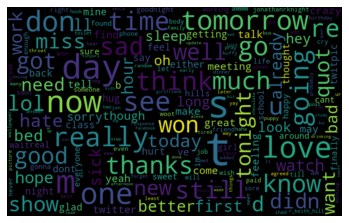

In [9]:
visualizar_dados.visualizar_word_cloud(nuvem_palavras)

### Nuvem palavras **Positivas**

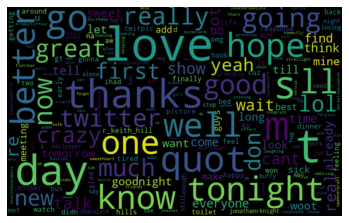

In [10]:
visualizar_dados.visualizar_word_cloud(nuvem_palavras_positivo)

### Nuvem palavras **Negativas**

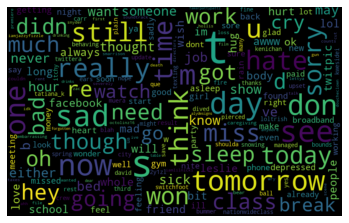

In [11]:
visualizar_dados.visualizar_word_cloud(nuvem_palavras_negativo)

## Remove Stop words

### Antes de remover Stop Words

In [12]:
tweets.head()

,Sentimento,Texto,Sentimento_Texto
800000,4,i love health4uandpets u guys r the best,positivo
800001,4,im meeting up with one of my besties tonight ...,positivo
800002,4,darealsunisakim thanks for the twitter add s...,positivo
800003,4,being sick can be really cheap when it hurts t...,positivo
800004,4,lovesbrooklyn2 he has that effect on everyone,positivo


In [13]:
tweets['Texto'] = tratar_dados.remover_stop_words(tweets, 'Texto')


### Após de remover Stop Words

In [14]:
tweets.head()

,Sentimento,Texto,Sentimento_Texto
800000,4,love health4uandpets u guys r best,positivo
800001,4,im meeting one besties tonight cant wait girl ...,positivo
800002,4,darealsunisakim thanks twitter add sunisa got ...,positivo
800003,4,sick really cheap hurts much eat real food plu...,positivo
800004,4,lovesbrooklyn2 effect everyone,positivo


## Visualizar nuvem de palavras após remover Stop Words

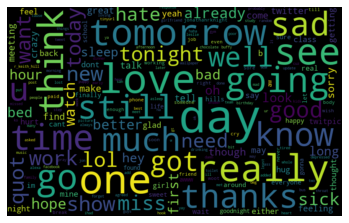

In [15]:
nuvem_palavras = tratar_dados.criar_nuvem_palavras(dados=tweets, campo="Texto")

visualizar_dados.visualizar_word_cloud(nuvem_palavras)


## Visualizar nuvem de palavras após remover abreviações comuns e algumas palavras irrelevantes

palavras_removidas = 'amp|today|tomorrow|going|girl|tonight|getting|day|get|http|com|go|one|lol'


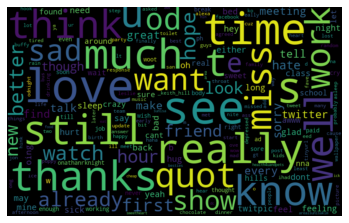

In [16]:
tweets['Texto'] = tweets['Texto'].apply(lambda x: tratar_dados.process_tweets(x))
nuvem_palavras  = tratar_dados.criar_nuvem_palavras(dados=tweets, campo="Texto")

visualizar_dados.visualizar_word_cloud(nuvem_palavras)

# Separando dados de teste e treinamento

## Vetorização

Foi utlizado o método **vetorizar, bag_of_words = treinamento.vetorizar(tweets, 'Texto')** para vetorizar que utiliza o CountVectorizer do sklearn.

O **CountVectorizer** é o responsável por fazer a vetorização dos dados de texto e transformá-los em uma matriz de frequência.

Com a **Vetorização** criei o **Bag-Of-Words** para realizar a análise dos sentimentos.

In [17]:
vetorizar, bag_of_words = treinamento.vetorizar(tweets, 'Texto')
X_treino, X_teste, y_treino, y_teste= treinamento.separar_dados_treinamento(bag_of_words.toarray(), tweets.Sentimento)


In [18]:
vetorizar.get_stop_words()
vetorizar.get_feature_names()

['bad',
 'bed',
 'better',
 'class',
 'dont',
 'feeling',
 'glad',
 'great',
 'hate',
 'hey',
 'hope',
 'hour',
 'know',
 'like',
 'long',
 'look',
 'love',
 'make',
 'meeting',
 'miss',
 'need',
 'new',
 'night',
 'od',
 'oh',
 'oing',
 'paid',
 'quot',
 'real',
 'really',
 'sad',
 'school',
 'sick',
 'sleep',
 'sorry',
 'talk',
 'tell',
 'thanks',
 'think',
 'thought',
 'till',
 'time',
 'twitpic',
 'twitter',
 'wait',
 'want',
 'watch',
 'work',
 'working',
 'yeah']

In [19]:
X_treino

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## 1 - Classificar sentimento (positivo e negativo) na base de tweets a ser fornecida utilizando 3 métodos diferentes: 

## Dois métodos clássicos 


### Logistic Regression

In [20]:
print('X_treino,   X_teste,  y_treino, y_teste')
print(X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape)


X_treino,   X_teste,  y_treino, y_teste
(140, 50) (60, 50) (140,) (60,)


In [21]:
predicao_regressao = treinamento.logistic_regression(X_treino, y_treino, X_teste, y_teste)
print("Accuracy : %s" % (np.round(accuracy_score(y_teste, predicao_regressao), 4)))

Accuracy : 0.65


In [22]:
classificacao_reg, score_reg = treinamento.metricas(y_teste, predicao_regressao)
print("Regressão Logistica")
print("Classificação: \n", classificacao_reg)
print("Score:", score_reg)
print("\n")


Regressão Logistica
Classificação: 
               precision    recall  f1-score   support

           0       0.59      0.90      0.71        29
           4       0.81      0.42      0.55        31

    accuracy                           0.65        60
   macro avg       0.70      0.66      0.63        60
weighted avg       0.71      0.65      0.63        60

Score: 0.6579532814238043




### Naive Bayes

In [23]:
predicao_naive_bayes = treinamento.naive_bayes(X_treino, y_treino, X_teste, y_teste)
print("Accuracy : %s" % (np.round(accuracy_score(y_teste, predicao_naive_bayes),4)))

Accuracy : 0.6667


In [24]:
classificacao_nb, score_nb = treinamento.metricas(y_teste, predicao_naive_bayes)
print("Naive Bayes")
print("Classificação: \n", classificacao_reg)
print("Score:", score_reg)

Naive Bayes
Classificação: 
               precision    recall  f1-score   support

           0       0.59      0.90      0.71        29
           4       0.81      0.42      0.55        31

    accuracy                           0.65        60
   macro avg       0.70      0.66      0.63        60
weighted avg       0.71      0.65      0.63        60

Score: 0.6579532814238043


## Um método utilizando Deep Learning 

In [25]:
# Definindo o modelo de camadas Deep Learning
model = deep_learning.definir_modelo(shape=(50,))

# Compilando o modelo
deep_learning.compilar_modelo(model)

# Treinando o modelo
history = deep_learning.treinar_modelo(model, X_treino, y_treino, X_teste, y_teste)


2021-08-15 19:54:59.246819: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-08-15 19:54:59.246854: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-08-15 19:54:59.246883: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (alan-Inspiron-3583): /proc/driver/nvidia/version does not exist
2021-08-15 19:54:59.247199: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-08-15 19:54:59.362872: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the 

Epoch 1/20
1/1 [==============================] - 1s 865ms/step - loss: 0.6082 - accuracy: 0.2571 - val_loss: 0.3874 - val_accuracy: 0.0333
Epoch 2/20
1/1 [==============================] - 0s 25ms/step - loss: 0.5643 - accuracy: 0.0429 - val_loss: 0.3460 - val_accuracy: 0.0167
Epoch 3/20
1/1 [==============================] - 0s 25ms/step - loss: 0.5296 - accuracy: 0.0429 - val_loss: 0.3108 - val_accuracy: 0.0167
Epoch 4/20
1/1 [==============================] - 0s 24ms/step - loss: 0.5006 - accuracy: 0.0429 - val_loss: 0.2791 - val_accuracy: 0.0000e+00
Epoch 5/20
1/1 [==============================] - 0s 25ms/step - loss: 0.4741 - accuracy: 0.0214 - val_loss: 0.2500 - val_accuracy: 0.0000e+00
Epoch 6/20
1/1 [==============================] - 0s 25ms/step - loss: 0.4498 - accuracy: 0.0214 - val_loss: 0.2227 - val_accuracy: 0.0000e+00
Epoch 7/20
1/1 [==============================] - 0s 27ms/step - loss: 0.4271 - accuracy: 0.0214 - val_loss: 0.1971 - val_accuracy: 0.0000e+00
Epoch 8/20

In [26]:
history_dict = history.history
print('Dicionario: ',history_dict.keys(), '\n')

print('Loss:'           ,history_dict['loss'],'\n')
print('Accuracy: '      ,history_dict['accuracy'],'\n')
print('Val Loss:'       ,history_dict['val_loss'],'\n')
print('Val Accuracy:'   ,history_dict['val_accuracy'],'\n')

Dicionario:  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy']) 

Loss: [0.608169674873352, 0.5642890930175781, 0.5295553803443909, 0.500607967376709, 0.4741484522819519, 0.4498170018196106, 0.4270612895488739, 0.40536069869995117, 0.3841317892074585, 0.3635465204715729, 0.343209445476532, 0.32316911220550537, 0.30287426710128784, 0.2822713553905487, 0.2618676722049713, 0.2412201166152954, 0.22058001160621643, 0.19971904158592224, 0.1784120351076126, 0.15732580423355103] 

Accuracy:  [0.2571428716182709, 0.04285714402794838, 0.04285714402794838, 0.04285714402794838, 0.02142857201397419, 0.02142857201397419, 0.02142857201397419, 0.02142857201397419, 0.014285714365541935, 0.0071428571827709675, 0.0071428571827709675, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 

Val Loss: [0.38740676641464233, 0.34600284695625305, 0.3108404278755188, 0.2791498005390167, 0.25002190470695496, 0.22268088161945343, 0.19711090624332428, 0.1723536103963852, 0.14836493134498596, 0.12473494559526443, 0

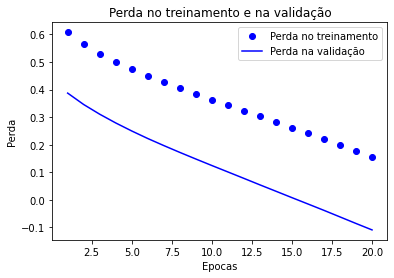

In [27]:
loss, val_loss, acc, val_acc = visualizar_dados.valor_accuracia(history_dict)

epochs = range(1, len(acc) + 1)
linhas = [[loss, 'bo', 'Perda no treinamento'],
          [val_loss, 'b', 'Perda na validação']]
titulos = {'title': 'Perda no treinamento e na validação',
           'xlabel': 'Epocas',
           'ylabel': 'Perda'
           }

visualizar_dados.visualizar_accuracia(epochs, linhas, titulos)


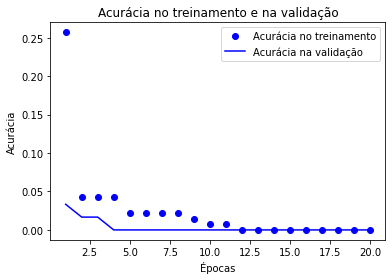

In [28]:
linhas = [[acc, 'bo', 'Acurácia no treinamento'],
          [val_acc, 'b', 'Acurácia na validação']]
titulos = {'title': 'Acurácia no treinamento e na validação',
           'xlabel': 'Épocas',
           'ylabel': 'Acurácia'
           }
visualizar_dados.visualizar_accuracia(epochs, linhas, titulos)


In [29]:
predito = model.predict(X_teste)
print(predito)

# Real
print(y_teste)

[[0.7156552 ]
 [0.6297654 ]
 [0.66061854]
 [0.55025256]
 [0.55025256]
 [0.576409  ]
 [0.55025256]
 [0.6361328 ]
 [0.53471196]
 [0.765869  ]
 [0.7261026 ]
 [0.55025256]
 [0.6075917 ]
 [0.624663  ]
 [0.6041887 ]
 [0.55025256]
 [0.75851214]
 [0.5876461 ]
 [0.55025256]
 [0.55025256]
 [0.5269261 ]
 [0.5826878 ]
 [0.6190148 ]
 [0.5659856 ]
 [0.6366655 ]
 [0.6627997 ]
 [0.57839084]
 [0.55025256]
 [0.55025256]
 [0.5940229 ]
 [0.55025256]
 [0.55025256]
 [0.53471196]
 [0.62557626]
 [0.55025256]
 [0.55025256]
 [0.69163036]
 [0.6452622 ]
 [0.6075917 ]
 [0.65550965]
 [0.5549005 ]
 [0.6075917 ]
 [0.85353565]
 [0.7872579 ]
 [0.55025256]
 [0.61239094]
 [0.55025256]
 [0.5992075 ]
 [0.6190148 ]
 [0.55025256]
 [0.62039465]
 [0.55025256]
 [0.64190865]
 [0.61213803]
 [0.55025256]
 [0.55025256]
 [0.6627997 ]
 [0.5549005 ]
 [0.6318443 ]
 [0.54416484]]
800095    4
800015    4
800030    4
58        0
28        0
15        0
800069    4
70        0
74        0
800045    4
800066    4
82        0
65        0
800

# 2 - Um método consiste em uma forma de vetorização (Contagem, vetor binário, TF-IDF, Embeddings, etc.) e um classificador 


## Matriz Esparsa

A Matriz Esparsa é criada com base no vetor de palavras usando elas como caracteristicas para definir se é Positivo, Negativo ou neutro.

Nesse caso forçei somente as 50 palavras mais utilizadas.

Utilizei o conceito de **Bag-of-Words**, para gerar essa Matriz Esparsa

In [30]:
# vetorizar, bag_of_words = treinamento.vetorizar(tweets)
matriz_esparsa = treinamento.criar_matriz_esparsa(bag_of_words, vetorizar)

matriz_esparsa

,bad,bed,better,class,dont,feeling,glad,great,hate,hey,...,till,time,twitpic,twitter,wait,want,watch,work,working,yeah
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Contagem

Aqui fiz uma contagem simples das palavras por sentimentos **Positivo**, **Negativo** e **Neutro**, logo após fiz o cálculo para saber a dieferença entre eles.

In [31]:
count_words = tratar_dados.contar_palavras(tweets)
count_words_positivo    = tratar_dados.contar_palavras(tweets.query("Sentimento_Texto == 'positivo'"))
count_words_negativo    = tratar_dados.contar_palavras(tweets.query("Sentimento_Texto == 'negativo'"))
count_words_neutro      = tratar_dados.contar_palavras(tweets.query("Sentimento_Texto == 'neutro'"))

print('Contagem Positivos:',count_words_positivo)
print('Contagem Negativos:',count_words_negativo)
print('Contagem Neutros:',count_words_neutro)

#calculo da razão com smoothing (add-one)
ratio_pos = (count_words_positivo + 1) / (count_words_negativo + 1)
ratio_neg = (count_words_negativo + 1) / (count_words_positivo + 1)

print('ratio_pos, ratio_neg:', ratio_pos, ratio_neg)

Contagem Positivos: 780
Contagem Negativos: 750
Contagem Neutros: 0
ratio_pos, ratio_neg: 1.0399467376830893 0.9615877080665813


## TF-IDF

TF-IDF significa “Frequência do termo - Frequência inversa do documento”.

Esta é uma técnica para quantificar uma palavra em documentos, geralmente calculamos um peso para cada palavra que significa a importância da palavra no documento e no corpus.

Este método é uma técnica amplamente utilizada na Recuperação de Informação e Mineração de Texto.

### Todos Sentimentos

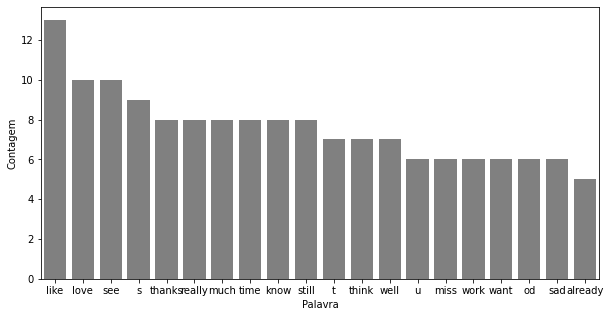

In [32]:
visualizar_dados.pareto(tweets, 'Texto', 20)

### Sentimentos Positivos

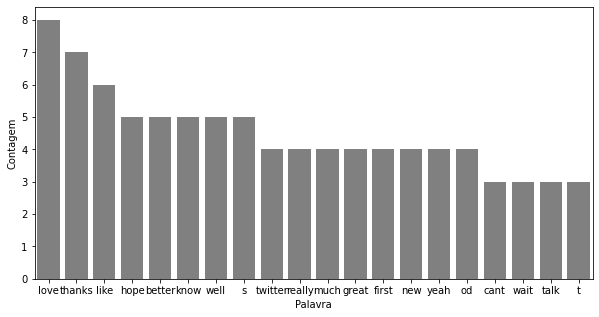

In [33]:
visualizar_dados.pareto(tweets.query("Sentimento_Texto == 'positivo'"), 'Texto', 20)

### Sentimentos Negativos

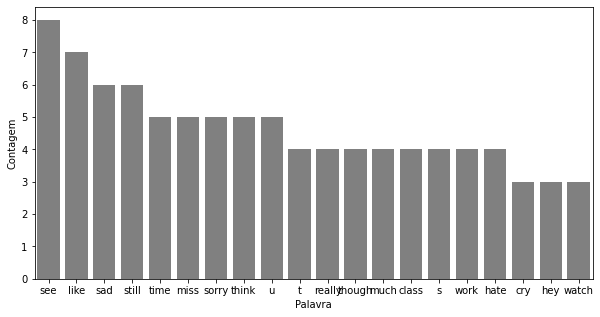

In [34]:
visualizar_dados.pareto(tweets.query("Sentimento_Texto == 'negativo'"), 'Texto', 20)

## 4 - Fazer comparativo dos métodos utilizando os critérios acima. 
Qual o melhor? 
O que pode melhorar? 
Quais as vantagens e desvantagens de cada método. 

## 5 - O trabalho deve ser obrigatoriamente apresentado. Haverá sorteio do dia da apresentação e a ordem. 
No dia da apresentação, o grupo terá 15 min para apresentar o trabalho (será utilizado compartilhamento de tela com o grupo).

O grupo pode utilizar qualquer recurso para facilitar a apresentação (slides, trechos de códigos, etc.)